In [1511]:
import skimage
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from skimage import feature
from scipy.ndimage import distance_transform_edt
from skimage import morphology, segmentation
from skimage import measure
from sklearn.cluster import KMeans
from skimage import color

In [1512]:
def show(image_1, image_2):
    f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
    
    ax0.imshow(image_1)
    ax1.imshow(image_2)

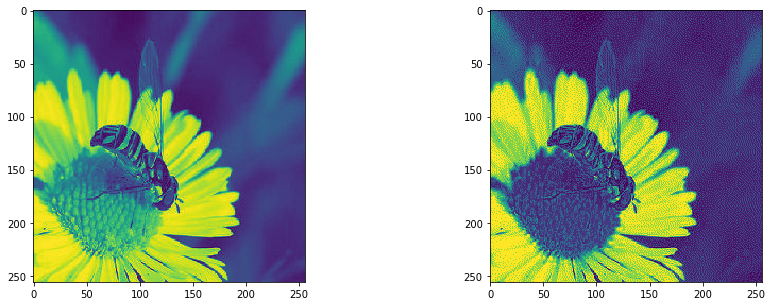

In [1513]:
pil_im = Image.open('/Users/romanilechko/Machine Learning/Datasets/FLOWERS/daisy/228.jpg')
orig = pil_im
pil_im = array(orig.convert('L'))
pil_im_p = array(orig.convert('P'))

show(pil_im, pil_im_p)

In [1514]:
from skimage import filters

In [1515]:
denoised = filters.median(pil_im, selem=np.ones((7, 7)))
denoised_2 = filters.median(pil_im_p, selem=np.ones((3, 3)))

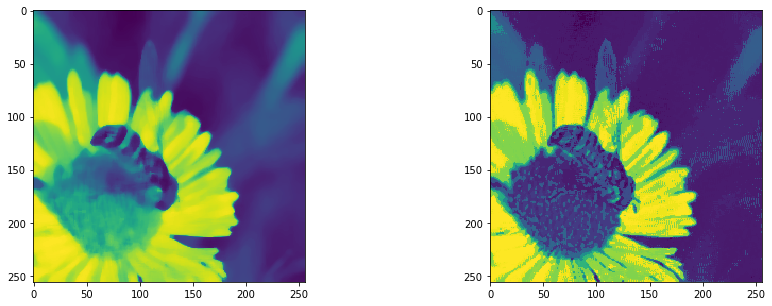

In [1516]:
show(denoised, denoised_2)

In [1517]:
edges_1 = skimage.feature.canny(denoised, sigma=3)
edges_2 = skimage.feature.canny(denoised_2, sigma=3)

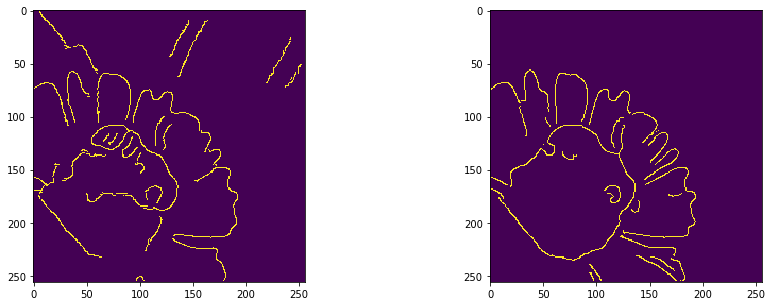

In [1518]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))

ax0.imshow(edges_1)
ax1.imshow(edges_2)

In [1519]:
dt_1 = distance_transform_edt(~edges_1)
dt_2 = distance_transform_edt(~edges_2)

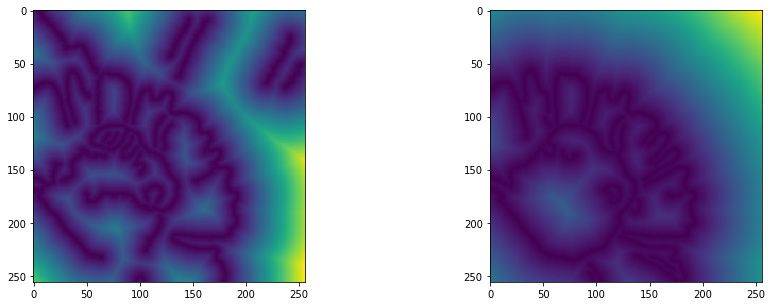

In [1520]:
show(dt_1, dt_2)

In [1521]:
peek_1 = feature.peak_local_max(dt_1, indices=False, min_distance=35)
peek_2 = feature.peak_local_max(dt_2, indices=False, min_distance=26)

peek_1s = feature.peak_local_max(dt_1, indices=True, min_distance=35)
peek_2s = feature.peak_local_max(dt_2, indices=True, min_distance=5)

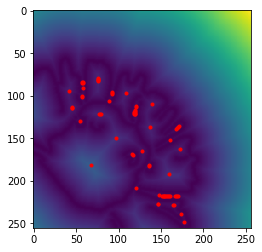

In [1522]:
plt.plot(peek_2s[:, 1], peek_2s[:, 0], 'r.')
plt.imshow(dt_2)

In [1523]:
marker_1 = skimage.measure.label(peek_1)
marker_2 = skimage.measure.label(peek_2)

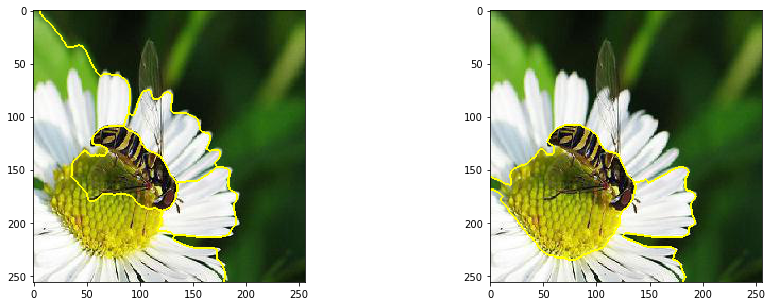

In [1524]:
label_1 = morphology.watershed(-dt_1, marker_1)
label_2 = morphology.watershed(-dt_2, marker_2)

show(segmentation.mark_boundaries(orig, label_1), segmentation.mark_boundaries(orig, label_2))

(256, 256) (256, 256, 3)


(array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 1., 1.]),
 array([ 46.70942745,  55.7735014 ,  64.83757535,  73.9016493 ,
         82.96572325,  92.02979719, 101.09387114, 110.15794509,
        119.22201904, 128.28609299, 137.35016694, 146.41424089,
        155.47831483, 164.54238878, 173.60646273, 182.67053668,
        191.73461063, 200.79868458, 209.86275853, 218.92683248,
        227.99090642]),
 <a list of 20 Patch objects>)

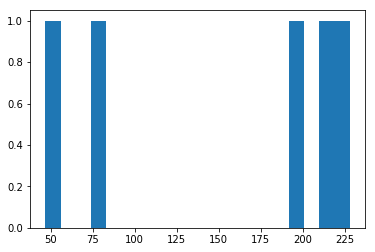

In [1525]:
print(label_1.shape, array(orig).shape)
regions_1 = measure.regionprops(label_1, intensity_image=array(orig.convert('L')))
regions_2 = measure.regionprops(label_2, intensity_image=array(orig.convert('P')))

regions_1_means = [r.mean_intensity for r in regions_1]
regions_2_means = [r2.mean_intensity for r2 in regions_2]

plt.hist(regions_1_means, bins=20)
#plt.hist(regions_2_means, bins=20)

In [1526]:
model_1 = KMeans(n_clusters=2)
model_2 = KMeans(n_clusters=2)

regions_1_means = np.array(regions_1_means).reshape(-1, 1)
regions_2_means = np.array(regions_2_means).reshape(-1, 1)

mo

In [1527]:
model_1.fit(regions_1_means)
model_2.fit(regions_2_means)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [1528]:
a1 = model_1.predict(regions_1_means)
a2 = model_2.predict(regions_2_means)

In [1529]:
c_l1 = label_1.copy()

for bg_fg, region in zip(a1, regions_1):
    c_l1[tuple(region.coords.T)] = bg_fg

In [1530]:
c_l2 = label_2.copy()

for bg_fg, region in zip(a1, regions_2):
    c_l2[tuple(region.coords.T)] = bg_fg

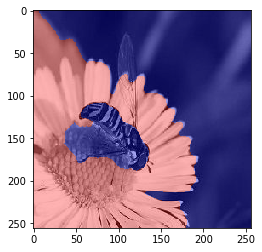

In [1531]:
plt.imshow(color.label2rgb(c_l1, image=array(orig)))

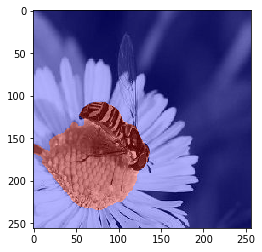

In [1532]:
plt.imshow(color.label2rgb(c_l2, image=array(orig)))